### Install Required Packages

In [1]:
! pip install numpy pandas sklearn

### Imports

    id    lcavol    weight  age      lbph  svi       lcp  gleason  pgg45  \
0    1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1    2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2    3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3    4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4    5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
..  ..       ...       ...  ...       ...  ...       ...      ...    ...   
92  93  2.830268  3.876396   68 -1.386294    1  1.321756        7     60   
93  94  3.821004  3.896909   44 -1.386294    1  2.169054        7     40   
94  95  2.907447  3.396185   52 -1.386294    1  2.463853        7     10   
95  96  2.882564  3.773910   68  1.558145    1  1.558145        7     80   
96  97  3.471966  3.974998   68  0.438255    1  2.904165        7     20   

        lpsa train  
0  -0.430783     T  
1  -0.162519     T  
2  -0.162519     T  
3  

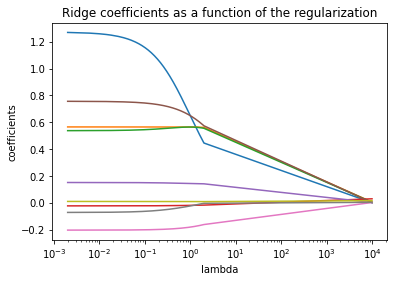

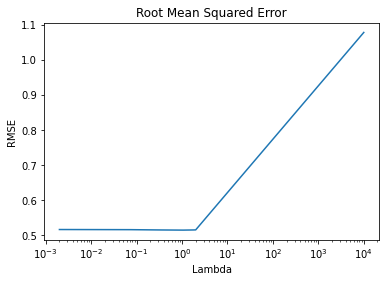

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error


df = pd.read_csv('datasets/rr/prostate.data', header=0, sep='\t')
df.columns = ['id', 'lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa', 'train']
print(df)

train_df = df[df['train'] == 'T']
test_df = df[df['train'] == 'F']


def plot_coeffs(lambdas, coeffs):
    ax = plt.gca()

    coeffs = np.reshape(coeffs, (len(coeffs), 9))

    ax.plot(lambdas, coeffs)
    ax.set_xscale('log')
    plt.xlabel('lambda')
    plt.ylabel('coefficients')
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')
    plt.show()


def plot_rmse(lambdas, rmse):
    ax = plt.gca()

    ax.plot(lambdas, rmse)
    ax.set_xscale('log')
    plt.xlabel('Lambda')
    plt.ylabel('RMSE')
    plt.title('Root Mean Squared Error')
    plt.axis('tight')
    plt.show()

class CustomRidgeRegression:
    def __init__(self):
        self.coeffs_ = None
        self.lambda_ = None

    def fit(self, X, y, lambda_parameter):
        """
        Fits the Linear Regression model
        :param X: dataframe contains the observations
        :param y: dataframe contains the target values
        """
        X = X.to_numpy()
        y = y.to_numpy()

        self.lambda_ = lambda_parameter

        # Append an extra column with ones to X (intercept)
        n = X.shape[0]
        ones_array = np.ones((n,1))
        ones_array[0] = 0
        X = np.hstack((ones_array, X))

        self.coeffs_ = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + self.lambda_ * np.identity(X.shape[1])), X.T), y)

    def predict(self, X):
        """
        Predicts the values of the given data
        :param X: dataframe contains the observations to predict
        :return The predicted value
        """
        X = X.to_numpy()
        n = X.shape[0]

        # Append an extra column with ones to X
        ones_array = np.ones((n,1))
        X = np.hstack((ones_array, X))
        return np.dot(X, self.coeffs_)


X_train = train_df[['lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
X_test = test_df[['lcavol', 'weight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']]
y_train = train_df[['lpsa']]
y_test = test_df[['lpsa']]

coeffs = []
rmse = []

rr = CustomRidgeRegression()

lambdas = np.arange(0.002, 2.0, 0.004)
for i in lambdas:
    rr.fit(X_train, y_train, i)
    coeffs.append(rr.coeffs_.tolist())
    y_pred = rr.predict(X_test)
    rmse.append(mean_squared_error(y_test, y_pred, squared=True))
    
rr.fit(X_train, y_train, 10000)
coeffs.append(rr.coeffs_.tolist())
lambdas = np.append(lambdas, 10000.0)
y_pred = rr.predict(X_test)
rmse.append(mean_squared_error(y_test, y_pred, squared=True))

plot_coeffs(lambdas, coeffs)
plot_rmse(lambdas, rmse)